# Лабораторная работа №2
## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных
## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных
Используем данные из соревнования [IEEE-CIS Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection/).

In [2]:
# Будем использовать только обучающую выборку
data = pd.merge(pd.read_csv('D:/Загрузки/IEEE-CIS Fraud Detection/train_transaction.csv', sep=","), 
                pd.read_csv('D:/Загрузки/IEEE-CIS Fraud Detection/train_identity.csv', sep=","), 
                on='TransactionID', how='left')

In [3]:
# Размер набора данных
data.shape

(590540, 434)

In [4]:
# Типы колонок
data.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object

In [5]:
# Проверим, есть ли пропущенные значения
data.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 590540


In [8]:
one_value_cols = [col for col in data.columns if data[col].nunique() <= 1]
print('Количество столбцов с одним уникальным значением: {}'.format(len(one_value_cols)))

Количество столбцов с одним уникальным значением: 0


## 1) Обработка пропусков в данных

In [9]:
# Удаление колонок, состоящих только из пустых значений
data.dropna(axis=1, how='all', inplace=True)
# Удаление колонок, содержащих пустые значения
(data.shape, data.dropna(axis=1, how='any').shape)

((590540, 434), (590540, 20))

In [10]:
# Удаление строк, состоящих только из пустых значений
data.dropna(axis=0, how='all', inplace=True)
# Удаление строк, содержащих пустые значения
(data.shape, data.dropna(axis=0, how='any').shape)

((590540, 434), (0, 434))

In [11]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [12]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_fill_zero = data.fillna(0)
data_fill_zero.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,0.0,150.0,discover,142.0,...,0,0.0,0,0,0,0,0,0,0,0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0,0.0,0,0,0,0,0,0,0,0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0,0.0,0,0,0,0,0,0,0,0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,0,0.0,0,0,0,0,0,0,0,0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


### Обработка пропусков в числовых данных

In [13]:
# Выберем числовые колонки с пропущенными значениями и колонки, где процент пропущенных значений превышает 16%
# Цикл по колонкам датасета
num_cols = []
drop_num_cols = []
cat_cols = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
            'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 
            'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
            'DeviceType', 'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 
            'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 
            'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 
            'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']
for col in data.columns:
    if col not in cat_cols:
        # Количество пустых значений 
        temp_null_count = data[data[col].isnull()].shape[0]
        dt = str(data[col].dtype)
        if temp_null_count>0 and (dt=='float64' or dt=='int64'):
            num_cols.append(col)
            temp_perc = round((temp_null_count / total_count) * 100.0, 2)
            if temp_perc >= 16:
                drop_num_cols.append(col)
            print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка dist1. Тип данных float64. Количество пустых значений 352271, 59.65%.
Колонка dist2. Тип данных float64. Количество пустых значений 552913, 93.63%.
Колонка D1. Тип данных float64. Количество пустых значений 1269, 0.21%.
Колонка D2. Тип данных float64. Количество пустых значений 280797, 47.55%.
Колонка D3. Тип данных float64. Количество пустых значений 262878, 44.51%.
Колонка D4. Тип данных float64. Количество пустых значений 168922, 28.6%.
Колонка D5. Тип данных float64. Количество пустых значений 309841, 52.47%.
Колонка D6. Тип данных float64. Количество пустых значений 517353, 87.61%.
Колонка D7. Тип данных float64. Количество пустых значений 551623, 93.41%.
Колонка D8. Тип данных float64. Количество пустых значений 515614, 87.31%.
Колонка D9. Тип данных float64. Количество пустых значений 515614, 87.31%.
Колонка D10. Тип данных float64. Количество пустых значений 76022, 12.87%.
Колонка D11. Тип данных float64. Количество пустых значений 279287, 47.29%.
Колонка D12. Тип данны

Колонка V94. Тип данных float64. Количество пустых значений 89164, 15.1%.
Колонка V95. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V96. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V97. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V98. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V99. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V100. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V101. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V102. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V103. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V104. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V105. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V106. Тип данных float64. Количество пустых значений 314, 0.05%.
Колонка V107. Тип данных float64. Количество пустых зна

Колонка V203. Тип данных float64. Количество пустых значений 450909, 76.36%.
Колонка V204. Тип данных float64. Количество пустых значений 450909, 76.36%.
Колонка V205. Тип данных float64. Количество пустых значений 450909, 76.36%.
Колонка V206. Тип данных float64. Количество пустых значений 450909, 76.36%.
Колонка V207. Тип данных float64. Количество пустых значений 450909, 76.36%.
Колонка V208. Тип данных float64. Количество пустых значений 450721, 76.32%.
Колонка V209. Тип данных float64. Количество пустых значений 450721, 76.32%.
Колонка V210. Тип данных float64. Количество пустых значений 450721, 76.32%.
Колонка V211. Тип данных float64. Количество пустых значений 450909, 76.36%.
Колонка V212. Тип данных float64. Количество пустых значений 450909, 76.36%.
Колонка V213. Тип данных float64. Количество пустых значений 450909, 76.36%.
Колонка V214. Тип данных float64. Количество пустых значений 450909, 76.36%.
Колонка V215. Тип данных float64. Количество пустых значений 450909, 76.36%.

Колонка V322. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V323. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V324. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V325. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V326. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V327. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V328. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V329. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V330. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V331. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V332. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V333. Тип данных float64. Количество пустых значений 508189, 86.05%.
Колонка V334. Тип данных float64. Количество пустых значений 508189, 86.05%.

In [14]:
# Количество числовых колонок с пропущенными значениями и колонок, где процент пропущенных значений превышает 16%
(len(num_cols), len(drop_num_cols))

(367, 213)

In [15]:
# Корреляция удаляемых столбцов с целевым признаком
data[drop_num_cols].corrwith(data['isFraud'], axis=0).sort_values()

D8      -0.142636
D7      -0.127199
id_01   -0.120099
V48     -0.115786
V49     -0.110920
           ...   
V201     0.328005
V242     0.360590
V244     0.364129
V246     0.366878
V257     0.383060
Length: 213, dtype: float64

In [16]:
# Корреляция удаляемых столбцов в датасете с пропусками, заполннеными нулями, с целевым признаком
data_fill_zero[drop_num_cols].corrwith(data['isFraud'], axis=0).sort_values()

id_01   -0.144516
V48     -0.091582
V1      -0.088305
V49     -0.088094
V8      -0.083168
           ...   
V244     0.246454
V200     0.262079
V246     0.266292
V201     0.268686
V257     0.281349
Length: 213, dtype: float64

In [17]:
# Удаление числовых колонок, где процент пропущенных значений превышает 16%
data.drop(columns=drop_num_cols, inplace=True)
data.shape

(590540, 221)

In [18]:
for item in drop_num_cols:
    num_cols.remove(item)
print('Количество оставшихся числовых колонок: {}'.format(len(num_cols)))

Количество оставшихся числовых колонок: 154


### "Внедрение значений" - импьютация (imputation)

In [19]:
# Фильтр по колонкам с пропущенными значениями
data[num_cols].head()

,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


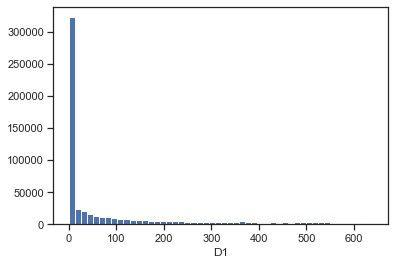

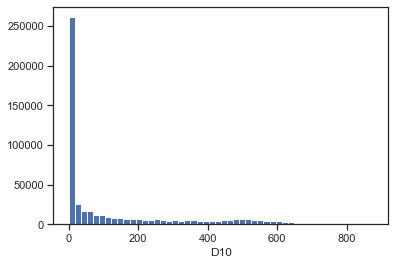

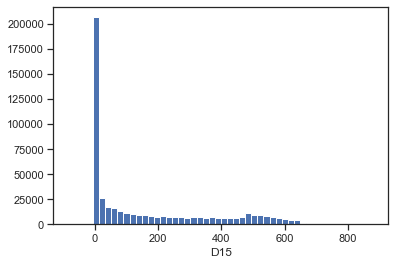

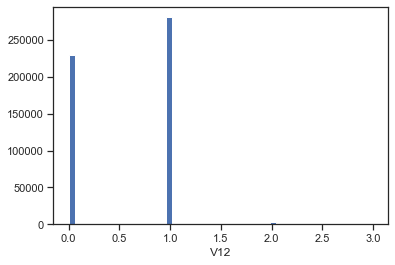

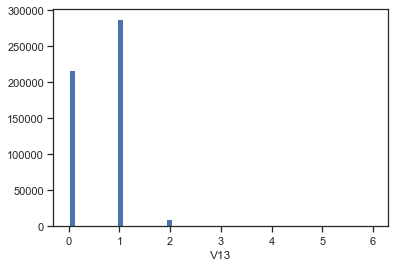

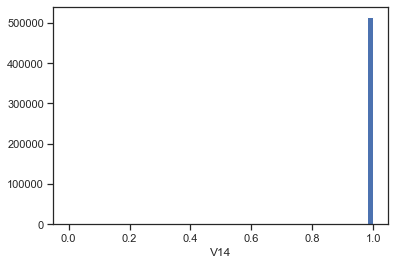

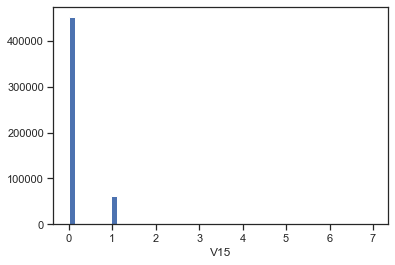

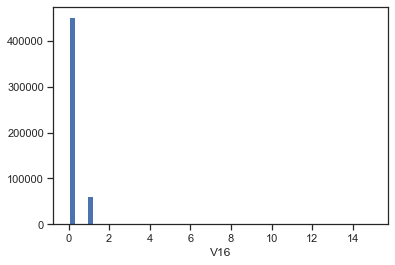

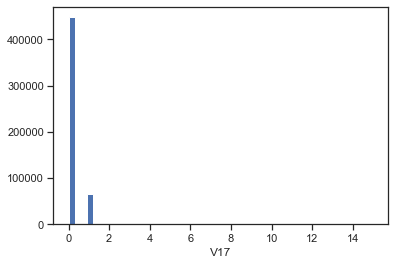

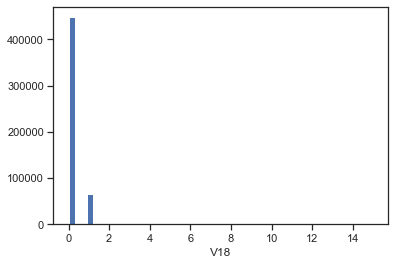

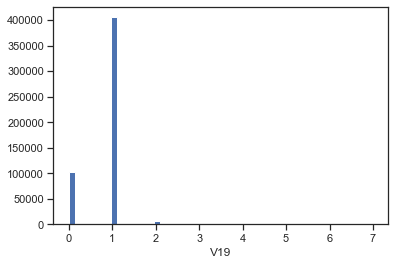

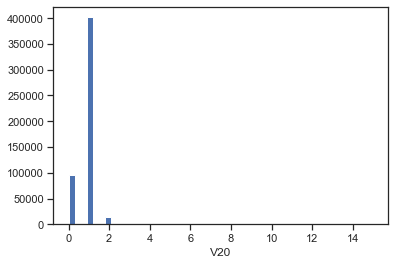

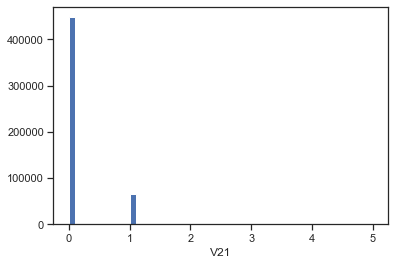

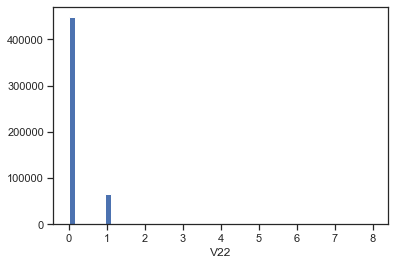

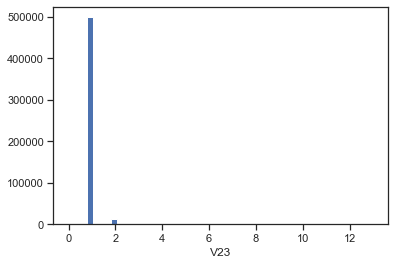

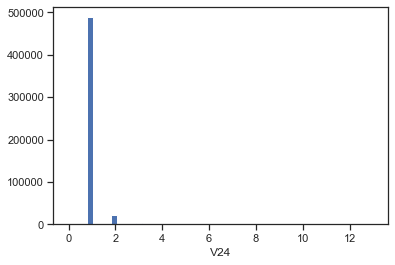

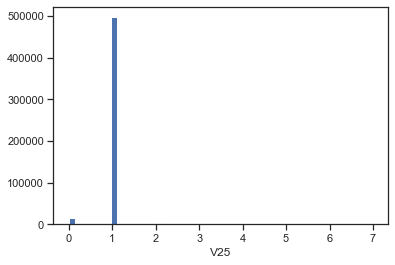

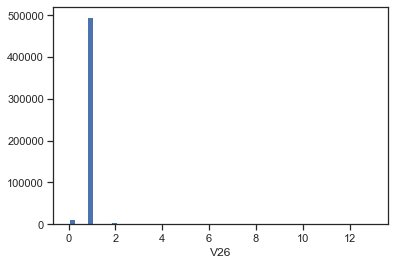

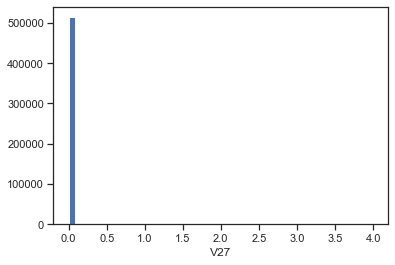

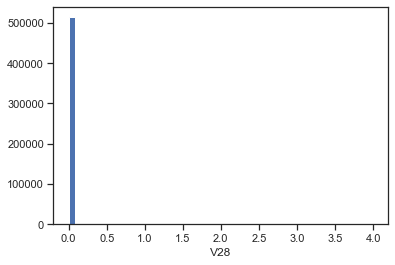

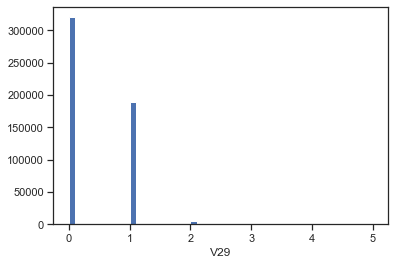

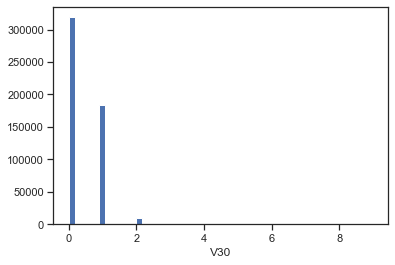

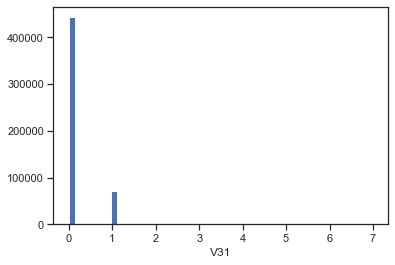

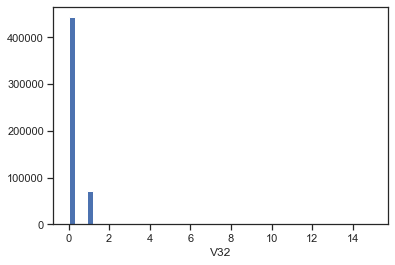

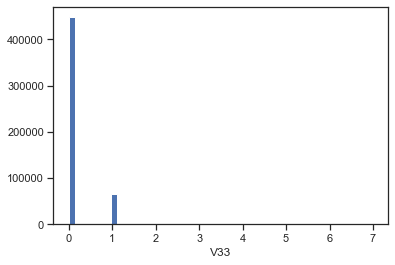

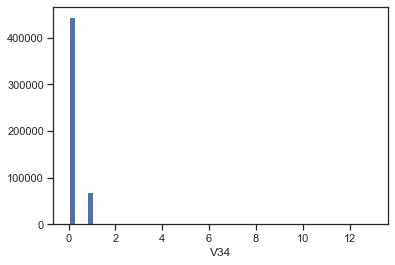

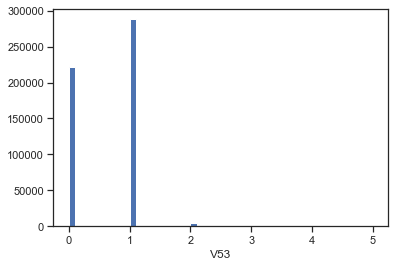

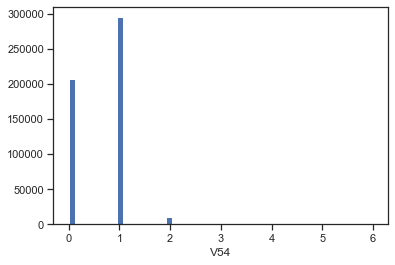

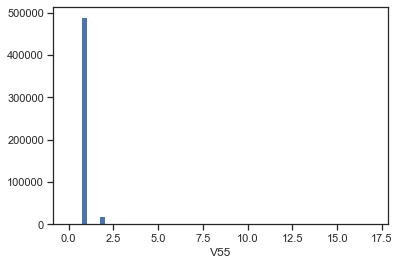

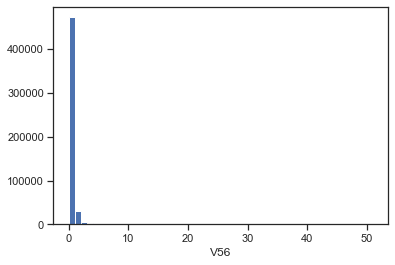

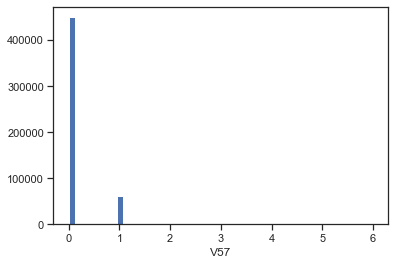

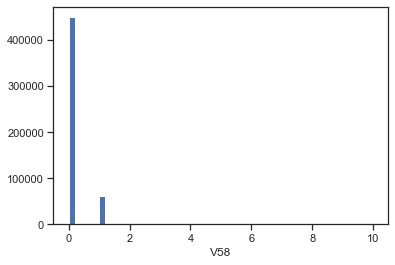

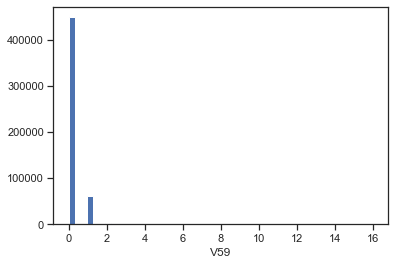

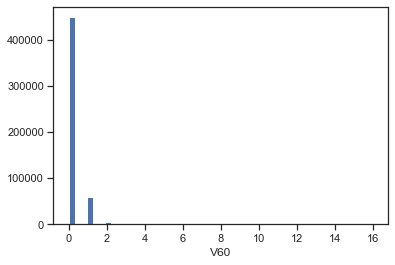

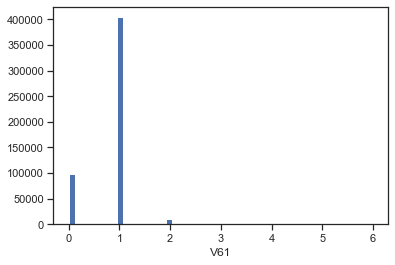

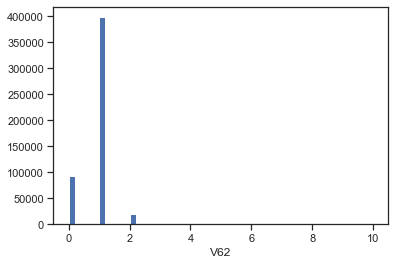

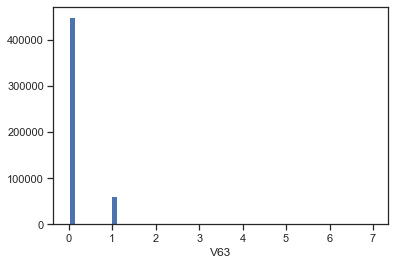

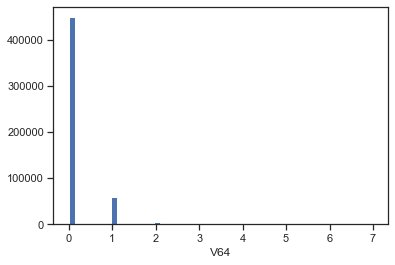

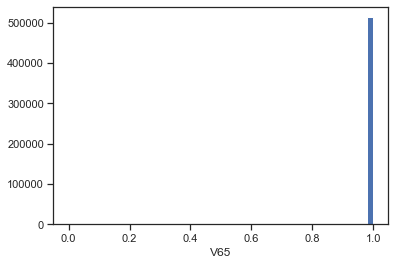

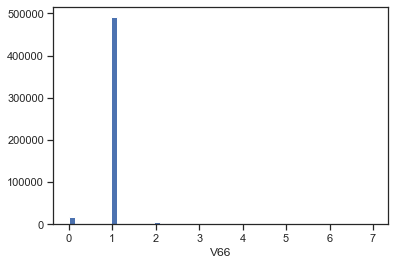

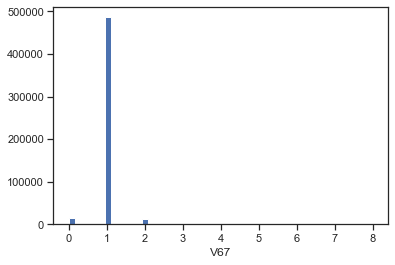

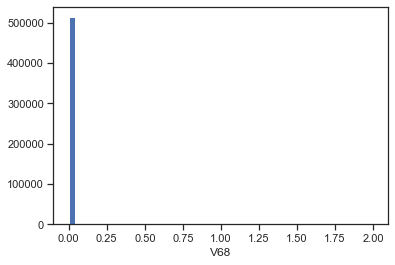

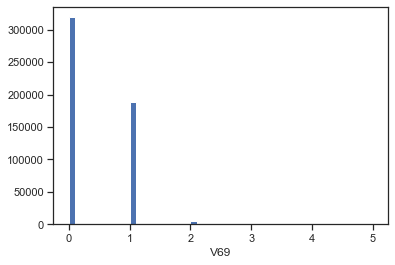

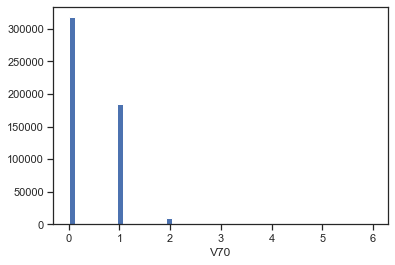

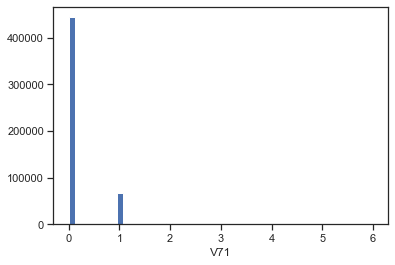

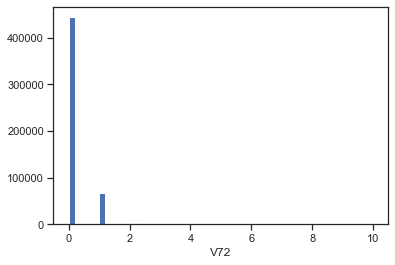

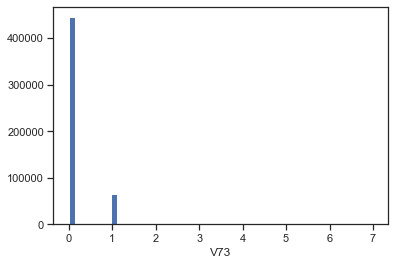

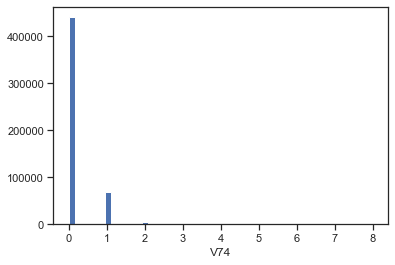

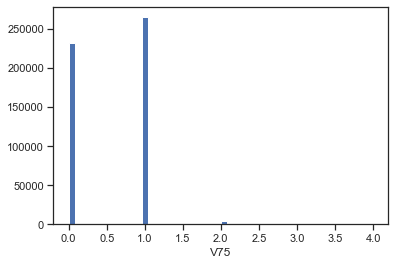

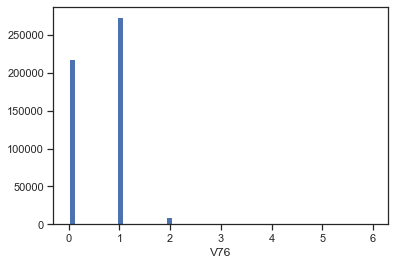

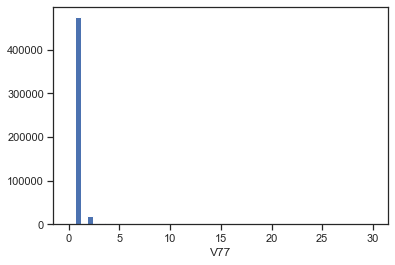

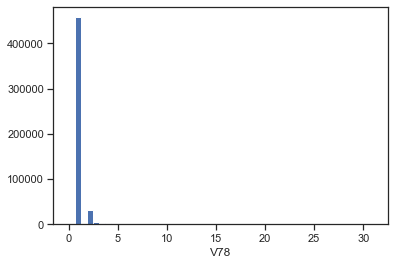

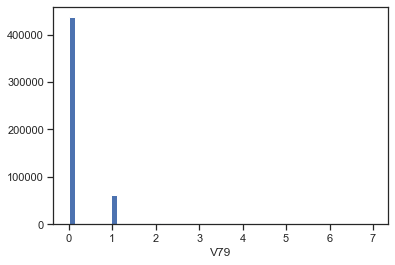

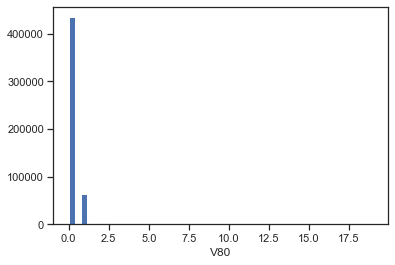

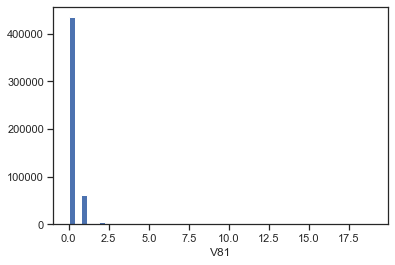

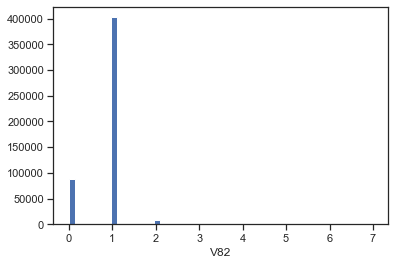

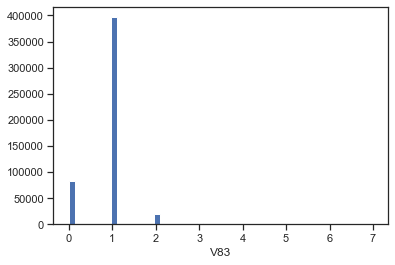

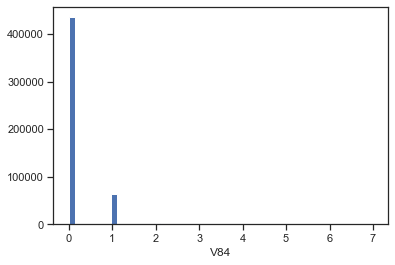

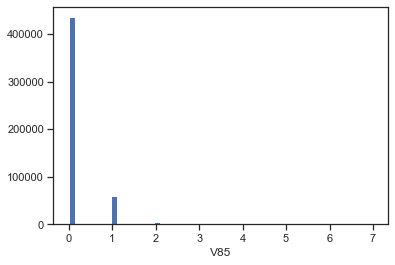

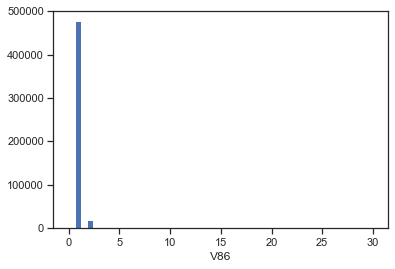

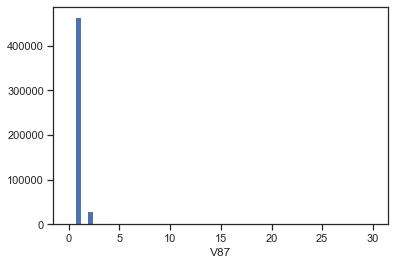

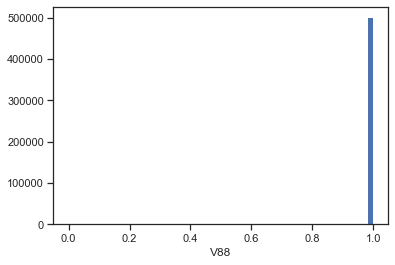

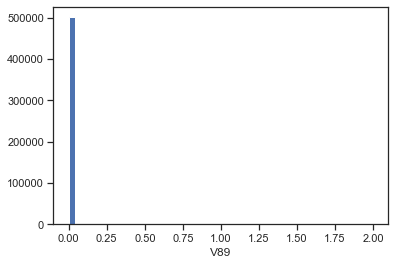

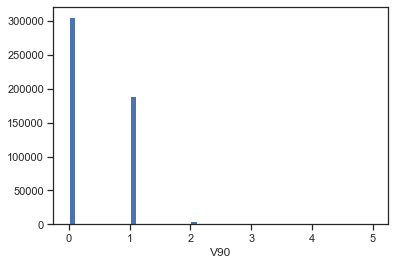

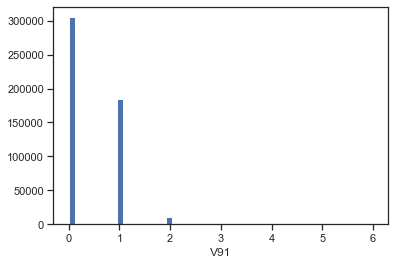

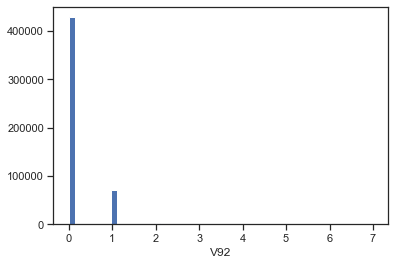

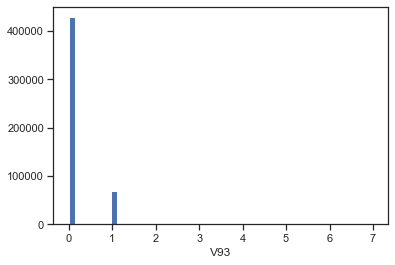

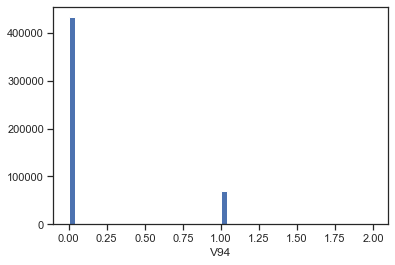

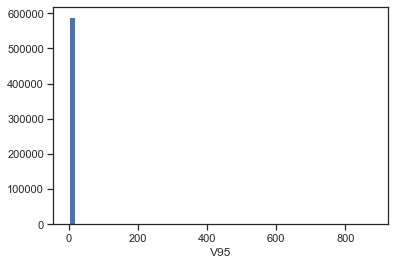

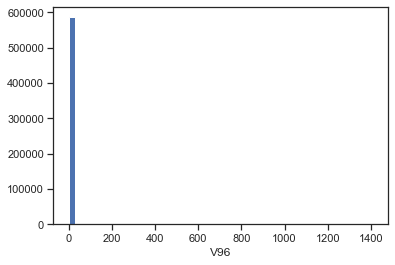

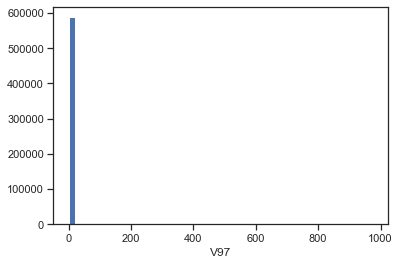

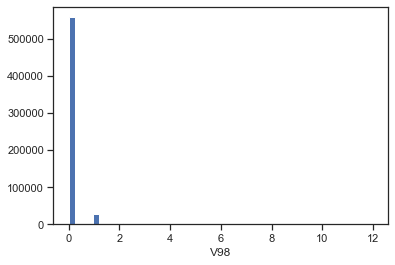

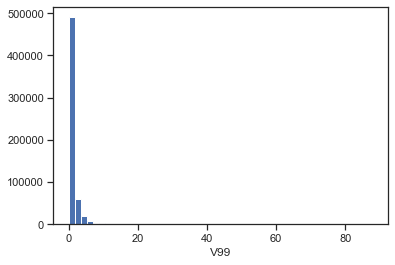

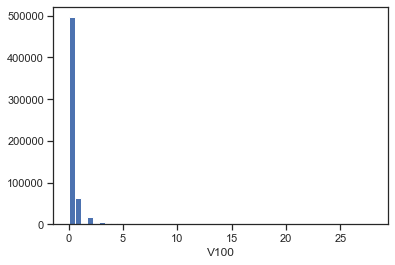

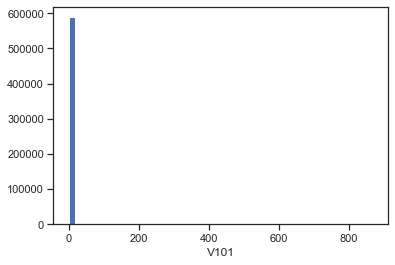

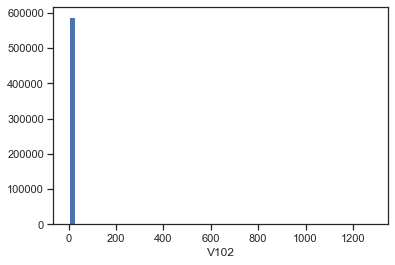

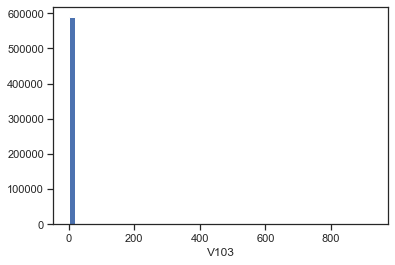

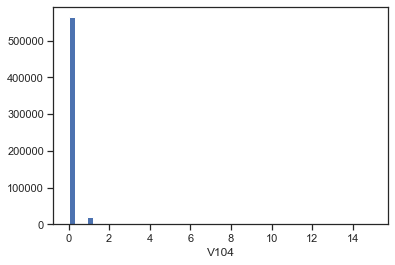

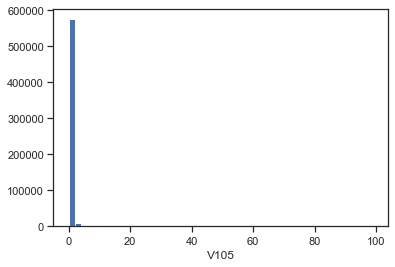

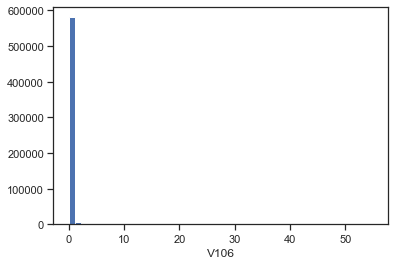

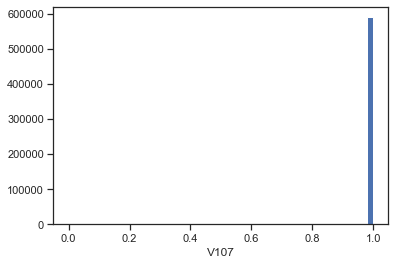

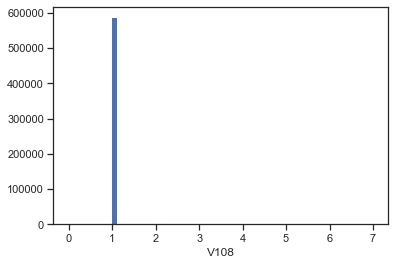

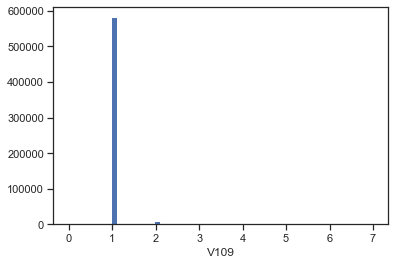

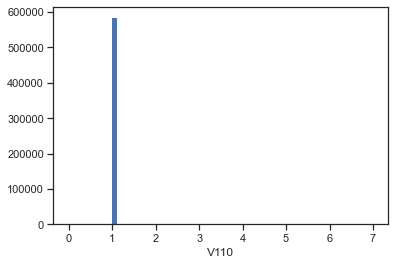

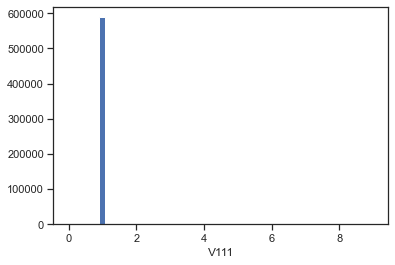

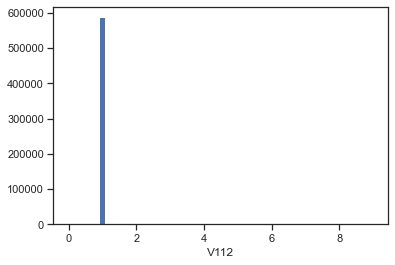

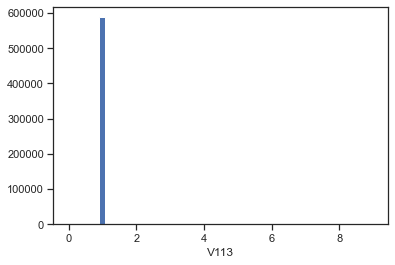

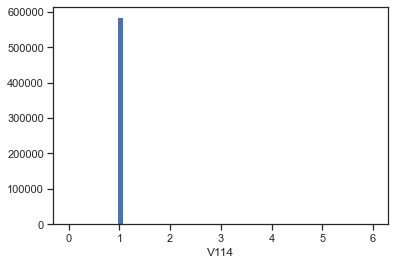

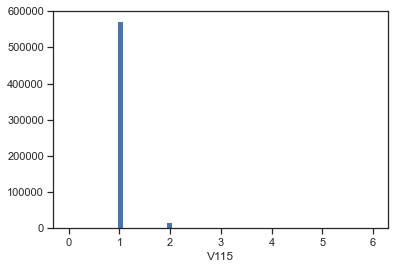

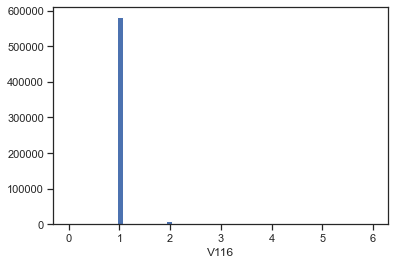

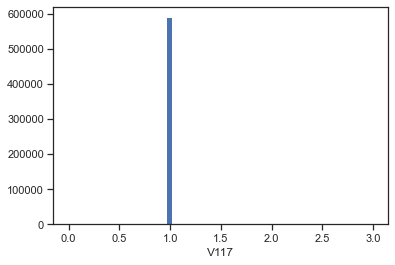

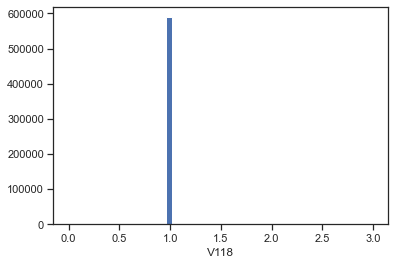

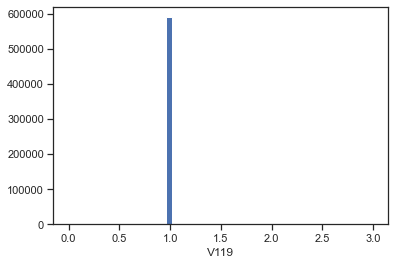

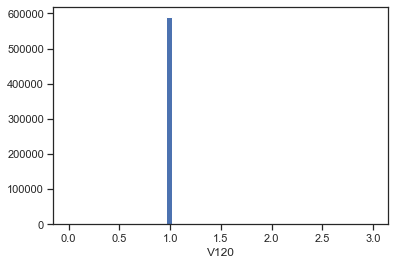

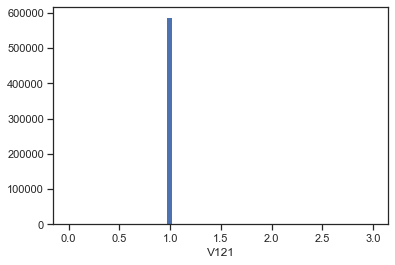

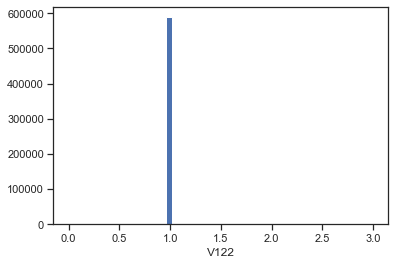

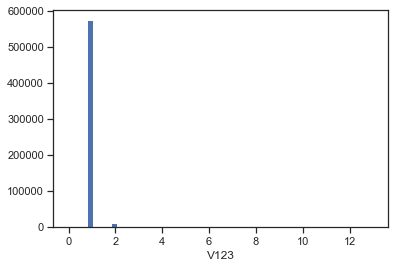

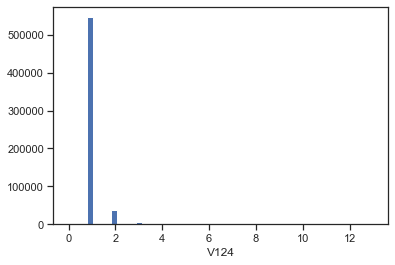

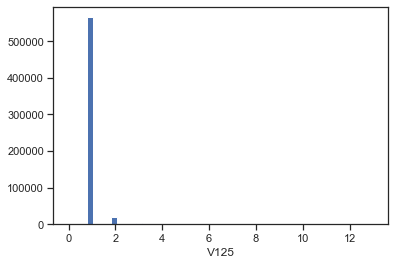

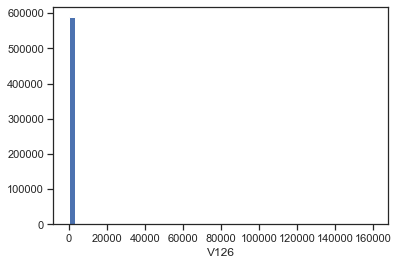

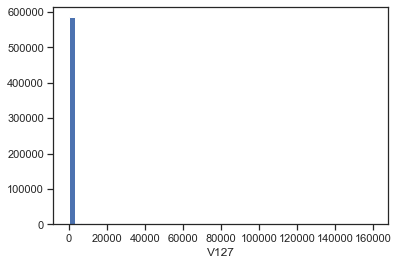

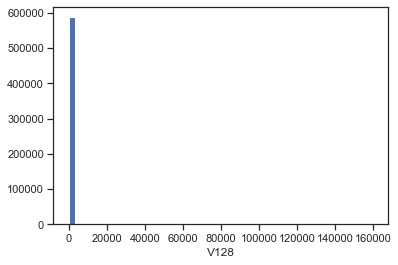

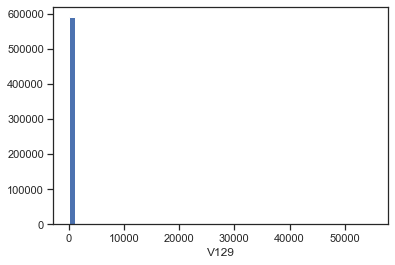

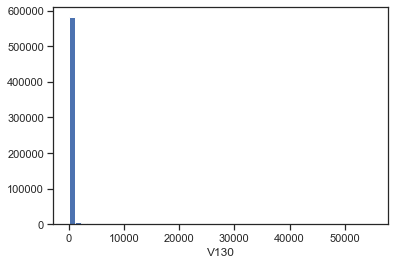

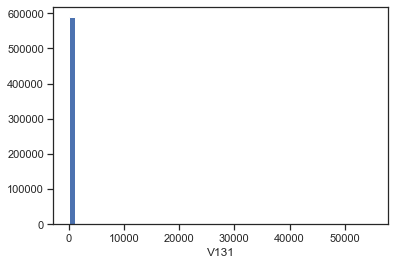

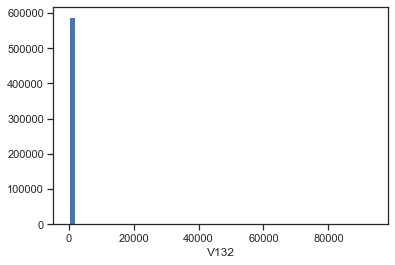

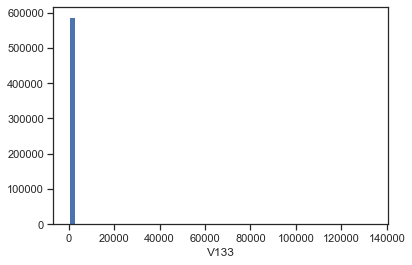

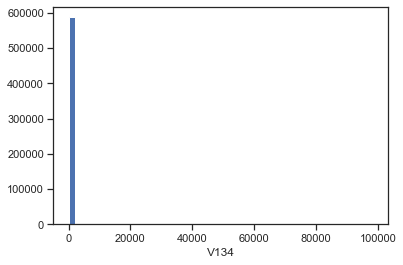

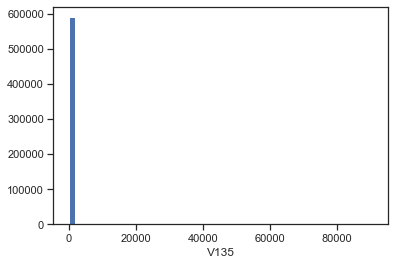

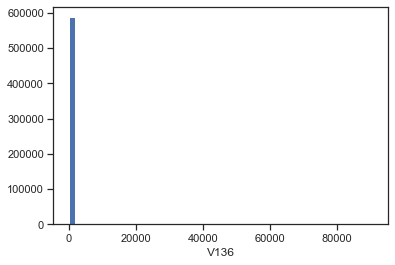

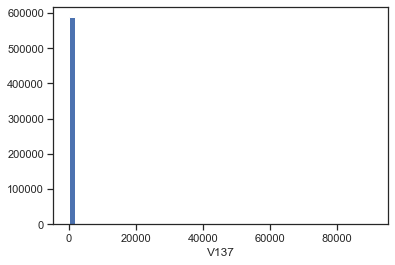

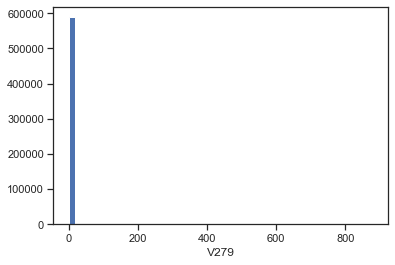

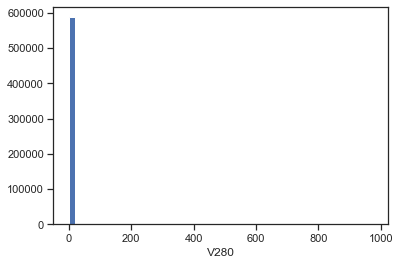

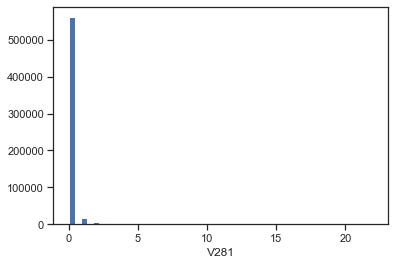

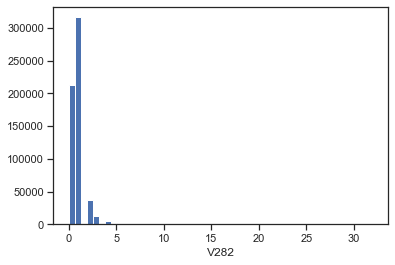

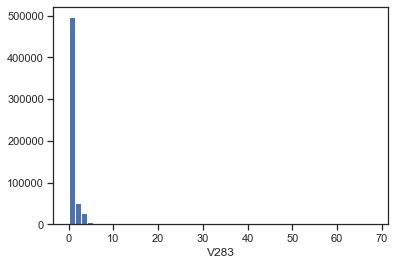

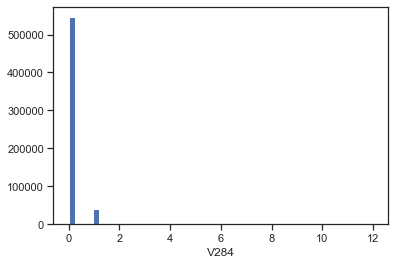

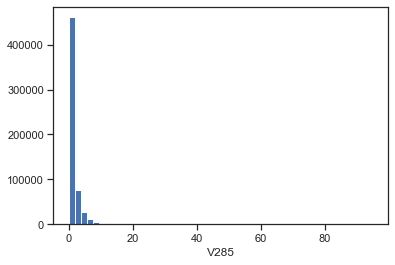

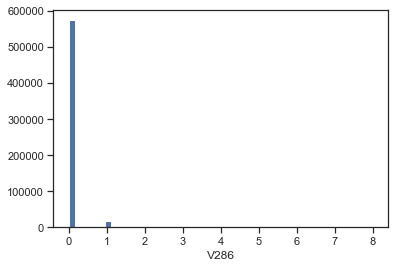

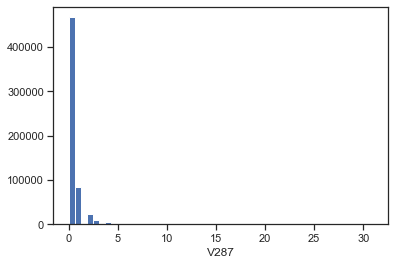

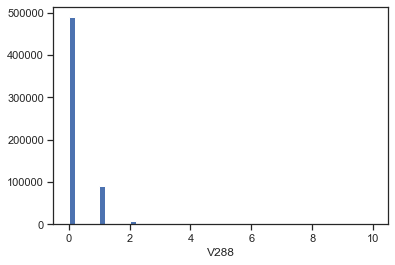

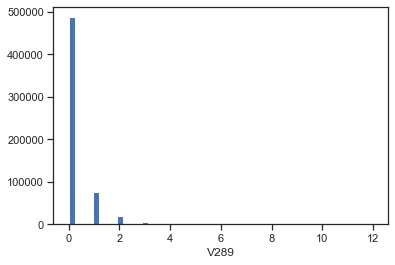

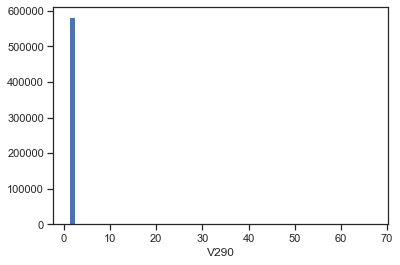

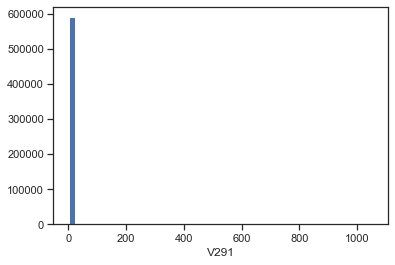

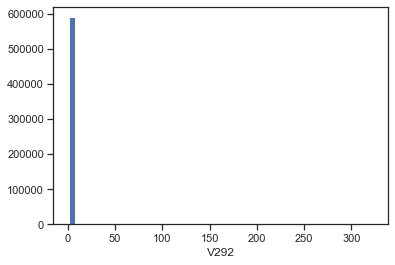

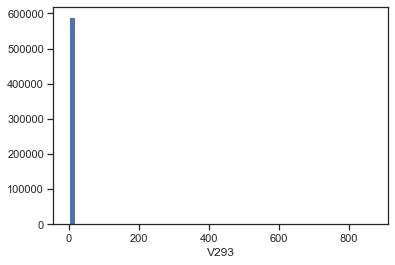

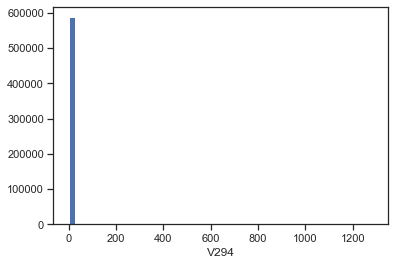

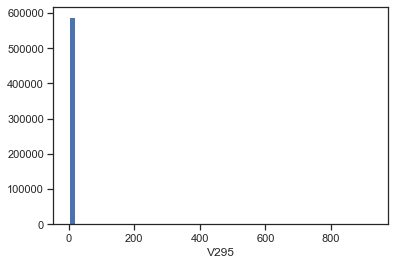

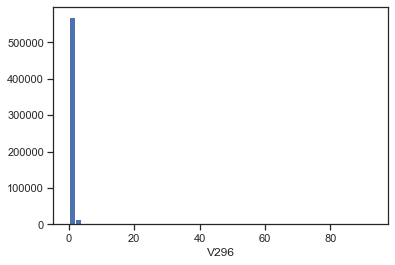

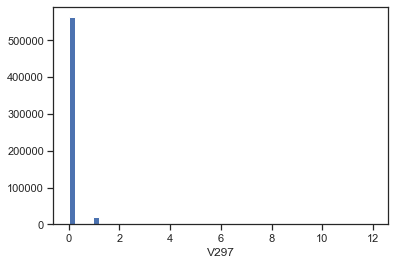

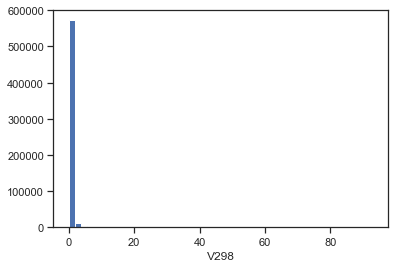

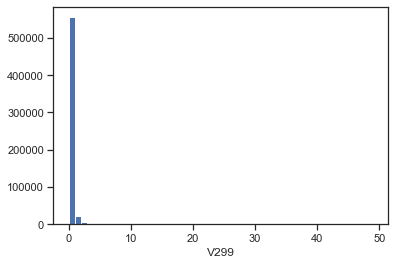

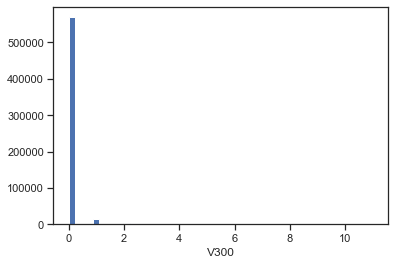

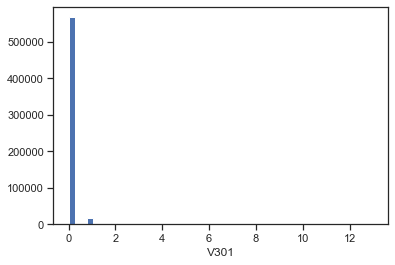

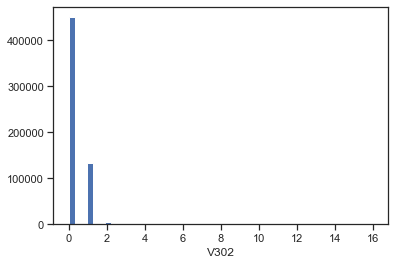

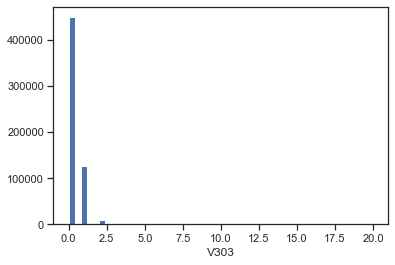

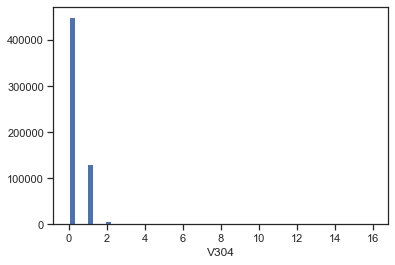

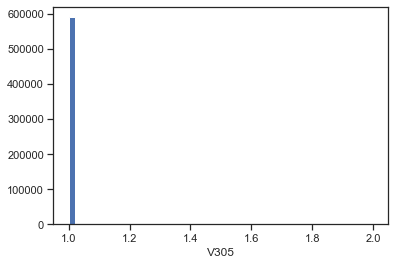

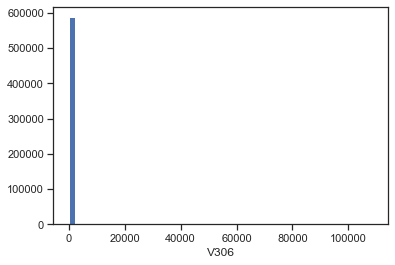

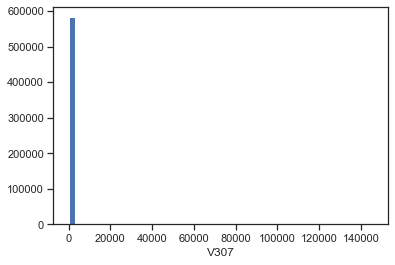

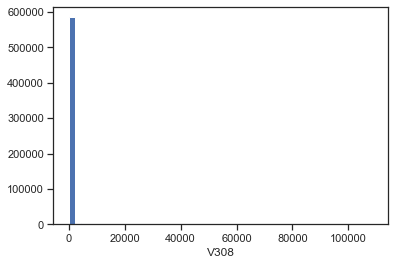

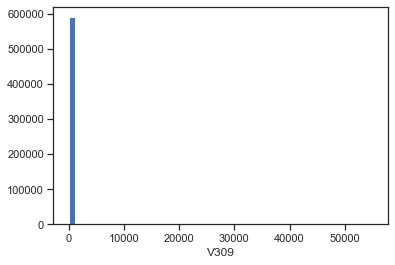

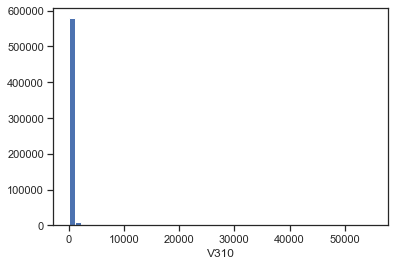

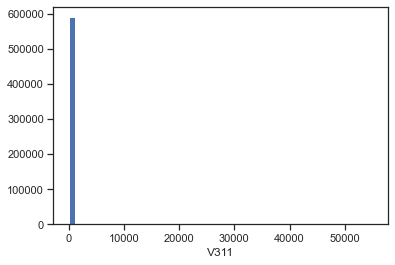

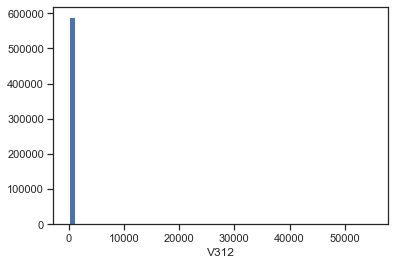

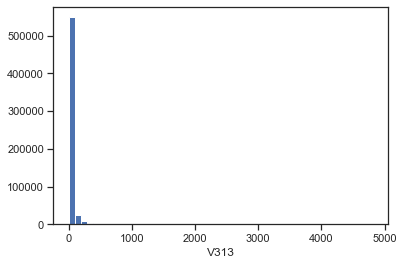

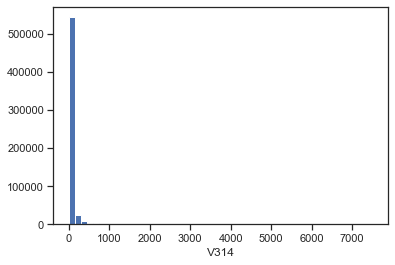

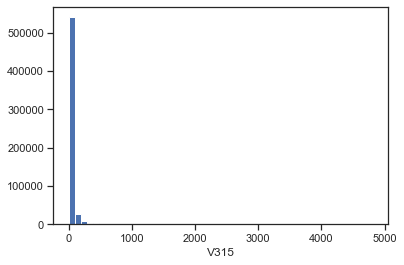

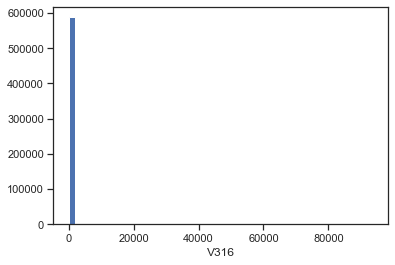

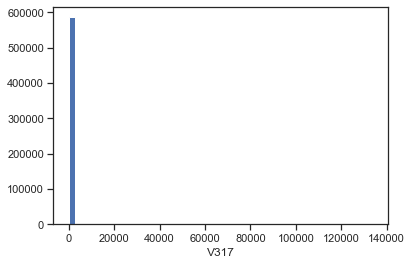

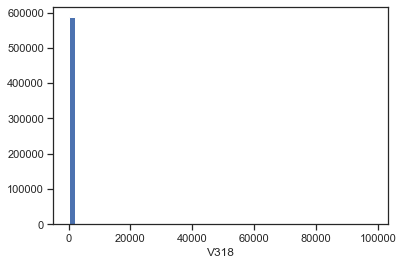

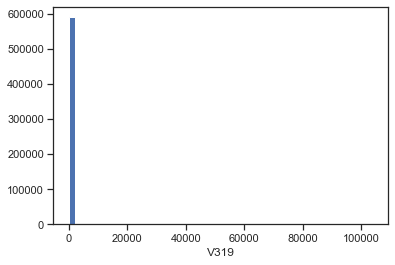

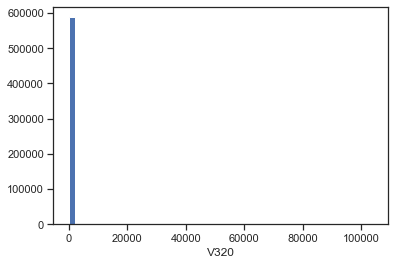

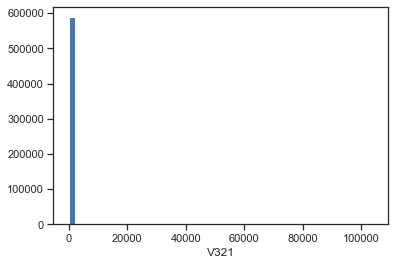

In [20]:
# Гистограмма по признакам
for col in data[num_cols]:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
# Импьютация столбцов 'D1', 'D10' и 'D15' стратегией 'медиана'
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
data.loc[:, 'D1'] = imp_med.fit_transform(data[['D1']])
data.loc[:, 'D10'] = imp_med.fit_transform(data[['D10']])
data.loc[:, 'D15'] = imp_med.fit_transform(data[['D15']])
num_cols.remove('D1')
num_cols.remove('D10')
num_cols.remove('D15')

In [23]:
# Импьютация остальных столбцов стратегией 'мода'
imp_mod = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
for item in num_cols:
    data.loc[:, item] = imp_mod.fit_transform(data[[item]])

In [24]:
data[num_cols].head()

,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Обработка пропусков в категориальных данных

In [25]:
# Выберем категориальные колонки с пропущенными значениями и колонки, где процент пропущенных значений превышает 16%
# Цикл по колонкам датасета
cat_cols_nan = []
drop_cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if (dt=='object') or (col in cat_cols):
        if col not in cat_cols:
            cat_cols.append(col)
        if temp_null_count>0:
            cat_cols_nan.append(col)
            temp_perc = round((temp_null_count / total_count) * 100.0, 2)
            if temp_perc >= 16:
                drop_cat_cols.append(col)
            print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка card2. Тип данных float64. Количество пустых значений 8933, 1.51%.
Колонка card3. Тип данных float64. Количество пустых значений 1565, 0.27%.
Колонка card4. Тип данных object. Количество пустых значений 1577, 0.27%.
Колонка card5. Тип данных float64. Количество пустых значений 4259, 0.72%.
Колонка card6. Тип данных object. Количество пустых значений 1571, 0.27%.
Колонка addr1. Тип данных float64. Количество пустых значений 65706, 11.13%.
Колонка addr2. Тип данных float64. Количество пустых значений 65706, 11.13%.
Колонка P_emaildomain. Тип данных object. Количество пустых значений 94456, 15.99%.
Колонка R_emaildomain. Тип данных object. Количество пустых значений 453249, 76.75%.
Колонка M1. Тип данных object. Количество пустых значений 271100, 45.91%.
Колонка M2. Тип данных object. Количество пустых значений 271100, 45.91%.
Колонка M3. Тип данных object. Количество пустых значений 271100, 45.91%.
Колонка M4. Тип данных object. Количество пустых значений 281444, 47.66%.
Колонка 

In [26]:
# Количество категориальных колонок с пропущенными значениями и колонок, где процент пропущенных значений превышает 16%
(len(cat_cols_nan), len(drop_cat_cols))

(47, 39)

In [27]:
# Удаление категориальных колонок, где процент пропущенных значений превышает 16%
data.drop(columns=drop_cat_cols, inplace=True)
data.shape

(590540, 182)

In [28]:
for item in drop_cat_cols:
    cat_cols_nan.remove(item)
    cat_cols.remove(item)
print('Количество оставшихся категориальных колонок: {}'.format(len(cat_cols_nan)))

Количество оставшихся категориальных колонок: 8


### Импьютация в категориальных данных

In [29]:
data[cat_cols_nan].head()

,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain
0,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN
1,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com
2,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com
3,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com
4,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com


In [30]:
# Импьютация категориальных столбцов стратегией 'Наиболее частый'
imp_mod2 = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
for item in cat_cols_nan:
    data.loc[:, item] = imp_mod2.fit_transform(data[[item]])

In [31]:
data[cat_cols_nan].head()

,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain
0,321.0,150.0,discover,142.0,credit,315.0,87.0,gmail.com
1,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com
2,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com
3,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com
4,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com


In [32]:
# Проверка, что в датасете не осталось пропущенных значений
print('Количество пропущенных значений: {}'.format(data.isnull().sum().sum()))

Количество пропущенных значений: 0


## 2) Кодирование категориальных признаков

In [33]:
# Выберем категориальные колонки
# Цикл по колонкам датасета
for col in cat_cols:
    dt = str(data[col].dtype)
    temp_un = data[col].nunique()
    print('Колонка {}. Тип данных {}. Количество уникальных значений {}.'.format(col, dt, temp_un))

Колонка ProductCD. Тип данных object. Количество уникальных значений 5.
Колонка card1. Тип данных int64. Количество уникальных значений 13553.
Колонка card2. Тип данных float64. Количество уникальных значений 500.
Колонка card3. Тип данных float64. Количество уникальных значений 114.
Колонка card4. Тип данных object. Количество уникальных значений 4.
Колонка card5. Тип данных float64. Количество уникальных значений 119.
Колонка card6. Тип данных object. Количество уникальных значений 4.
Колонка addr1. Тип данных float64. Количество уникальных значений 332.
Колонка addr2. Тип данных float64. Количество уникальных значений 74.
Колонка P_emaildomain. Тип данных object. Количество уникальных значений 59.


In [34]:
data[cat_cols].head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain
0,W,13926,321.0,150.0,discover,142.0,credit,315.0,87.0,gmail.com
1,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com
2,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com
3,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com
4,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com


### Кодирование категорий целочисленными значениями - label encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
col_le = ['card1', 'card2', 'card3', 'card5', 'addr1']
le = LabelEncoder()
for item in col_le:
    data.loc[:, item] = le.fit_transform(data[item])
    cat_cols.remove(item)
data[col_le].head()

,card1,card2,card3,card5,addr1
0,10095,220,42,38,166
1,1372,303,42,2,173
2,2833,389,42,58,178
3,13341,466,42,14,282
4,2712,413,42,2,241


### Кодирование категорий наборами бинарных значений - one-hot encoding

In [37]:
one_hot = pd.get_dummies(data[cat_cols].astype(str))
one_hot.head()

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Замена исходных категориальных колонок наборами бинарных значений
data = data.join(one_hot)
data.drop(columns=cat_cols, inplace=True)

In [40]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,C1,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2987000,0,86400,68.5,10095,220,42,38,166,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2987001,0,86401,29.0,1372,303,42,2,173,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2987002,0,86469,59.0,2833,389,42,58,178,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2987003,0,86499,50.0,13341,466,42,14,282,2.0,...,0,0,0,0,1,0,0,0,0,0
4,2987004,0,86506,50.0,2712,413,42,2,241,1.0,...,0,0,0,0,0,0,0,0,0,0


## 3) Масштабирование данных

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Выберем колонки с количеством уникальных значений больше 2
cols = []
for col in data.columns:
    temp_un = data[col].nunique()
    if temp_un > 2:
        cols.append(col)
    print('Колонка {}. Количество уникальных значений {}.'.format(col, temp_un))

Колонка TransactionID. Количество уникальных значений 590540.
Колонка isFraud. Количество уникальных значений 2.
Колонка TransactionDT. Количество уникальных значений 573349.
Колонка TransactionAmt. Количество уникальных значений 20902.
Колонка card1. Количество уникальных значений 13553.
Колонка card2. Количество уникальных значений 500.
Колонка card3. Количество уникальных значений 114.
Колонка card5. Количество уникальных значений 119.
Колонка addr1. Количество уникальных значений 332.
Колонка C1. Количество уникальных значений 1657.
Колонка C2. Количество уникальных значений 1216.
Колонка C3. Количество уникальных значений 27.
Колонка C4. Количество уникальных значений 1260.
Колонка C5. Количество уникальных значений 319.
Колонка C6. Количество уникальных значений 1328.
Колонка C7. Количество уникальных значений 1103.
Колонка C8. Количество уникальных значений 1253.
Колонка C9. Количество уникальных значений 205.
Колонка C10. Количество уникальных значений 1231.
Колонка C11. Количе

Колонка addr2_101.0. Количество уникальных значений 2.
Колонка addr2_102.0. Количество уникальных значений 2.
Колонка addr2_13.0. Количество уникальных значений 2.
Колонка addr2_14.0. Количество уникальных значений 2.
Колонка addr2_15.0. Количество уникальных значений 2.
Колонка addr2_16.0. Количество уникальных значений 2.
Колонка addr2_17.0. Количество уникальных значений 2.
Колонка addr2_18.0. Количество уникальных значений 2.
Колонка addr2_19.0. Количество уникальных значений 2.
Колонка addr2_20.0. Количество уникальных значений 2.
Колонка addr2_21.0. Количество уникальных значений 2.
Колонка addr2_22.0. Количество уникальных значений 2.
Колонка addr2_23.0. Количество уникальных значений 2.
Колонка addr2_24.0. Количество уникальных значений 2.
Колонка addr2_25.0. Количество уникальных значений 2.
Колонка addr2_26.0. Количество уникальных значений 2.
Колонка addr2_27.0. Количество уникальных значений 2.
Колонка addr2_28.0. Количество уникальных значений 2.
Колонка addr2_29.0. Количе

In [48]:
# Исключение столбцов с ID из масштабирования данных
cols.remove('TransactionID')
cols.remove('TransactionDT')
#
for item in col_le:
    cols.remove(item)

In [49]:
data[cols].head()

,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,68.5,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,29.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,50.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### MinMax масштабирование

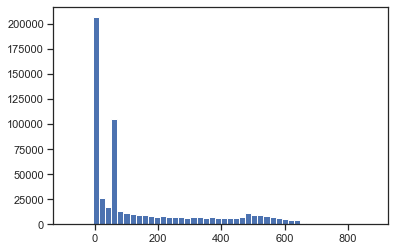

In [50]:
plt.hist(data['D15'], 50)
plt.show()

In [51]:
# MinMax масштабирование
sc1 = MinMaxScaler()
for item in cols:
    data.loc[:, item] = sc1.fit_transform(data[[item]])

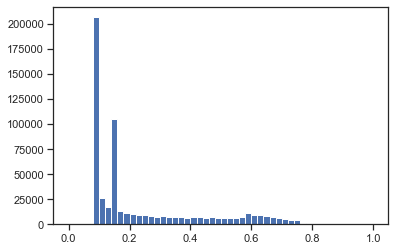

In [52]:
plt.hist(data['D15'], 50)
plt.show()

In [53]:
data[cols].head()

,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0.002137,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0000,0.004762,...,0.000000,0.0,0.0,0.0,0.000000,0.000873,0.000000,0.0,0.0,0.0
1,0.000900,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.001840,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0000,0.004762,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.001558,0.000427,0.000879,0.0,0.0,0.0,0.001775,0.0,0.0000,0.004762,...,0.002449,0.0,0.0,0.0,0.000533,0.010476,0.008022,0.0,0.0,0.0
4,0.001558,0.000213,0.000176,0.0,0.0,0.0,0.000444,0.0,0.0003,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [54]:
data.drop(columns=['TransactionID', 'TransactionDT'], inplace=True)

In [55]:
# Окончательный датасет
data.head()

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,C1,C2,C3,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,0,0.002137,10095,220,42,38,166,0.000213,0.000176,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000900,1372,303,42,2,173,0.000213,0.000176,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.001840,2833,389,42,58,178,0.000213,0.000176,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.001558,13341,466,42,14,282,0.000427,0.000879,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0,0.001558,2712,413,42,2,241,0.000213,0.000176,0.0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Сохранение получившегося датасета
data.to_csv('D:/Загрузки/IEEE-CIS Fraud Detection/newdone_train.csv')

In [57]:
data.corrwith(data['isFraud'], axis=0).sort_values()

ProductCD_W   -0.135549
V29           -0.102738
V90           -0.102635
V69           -0.102396
card6_debit   -0.100464
                 ...   
V94            0.161454
V79            0.167299
V87            0.221568
V86            0.222343
isFraud        1.000000
Length: 321, dtype: float64